In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('enjoysports.csv')
print("Data:\n", data)

Data:
      sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes


In [ ]:
def entropy(y):
    value, counts = np.unique(y, return_counts=True)
    entropy = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(value))])
    return entropy

In [ ]:
def information_gain(data, feature, target="enjoysport"):
    total = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weight = np.sum([(counts[i] / np.sum(counts)) * entropy(data[data[feature] == values[i]][target]) for i in range(len(values))])
    ig = total - weight
    return ig

In [ ]:
class DecisionTreeID3:
    def __init__(self, data, target="enjoysport"):
        self.data = data
        self.target = target
        self.tree = self._build_tree(data) # Changed _build_tree to _build_tree

    def _build_tree(self, data):
        if len(np.unique(data[self.target])) == 1:
            return np.unique(data[self.target])[0]

        if len(data.columns) == 1:
            return data[self.target].mode()[0]

        info_gains = {feature: information_gain(data, feature) for feature in data.columns if feature != self.target}
        best_feature = max(info_gains, key=info_gains.get)
        tree = {best_feature: {}}
        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value].drop([best_feature], axis=1)
            subtree = self._build_tree(sub_data)
            tree[best_feature][value] = subtree
        return tree

In [ ]:
tree = DecisionTreeID3(data)
print("Tree:\n", tree.tree)

Tree:
 {'sky': {'rainy': 'no', 'sunny': 'yes'}}


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('enjoysports.csv')

In [ ]:
print("Loaded Data:\n", data)

Loaded Data:
      sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes


In [ ]:
label_encoders = {}
for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le
X = data.drop(columns=["enjoysport"])
y = data["enjoysport"]

In [ ]:
cf = tree.DecisionTreeClassifier(criterion="entropy")
cf = cf.fit(X, y)

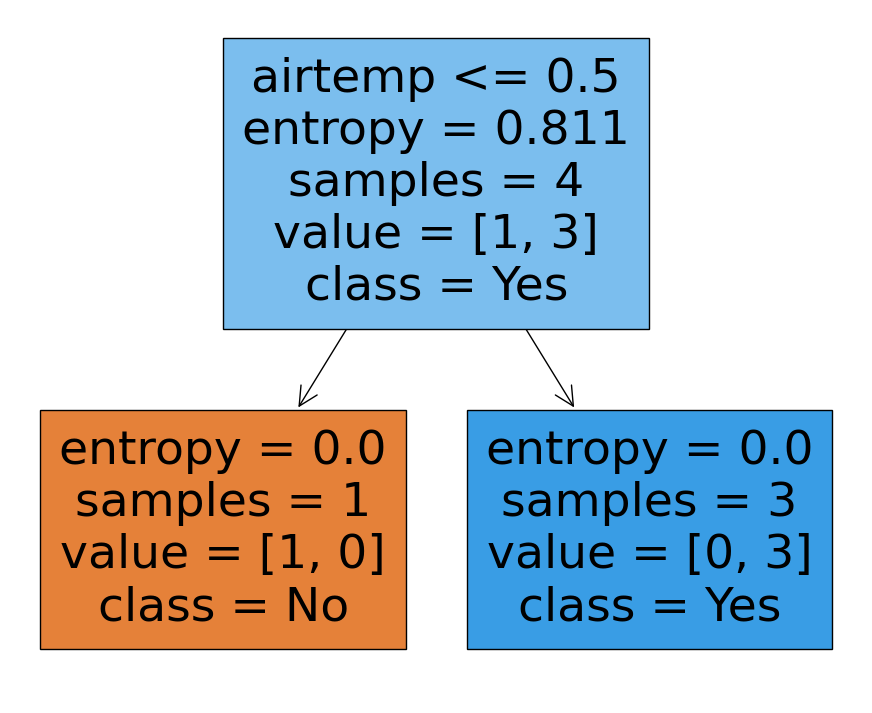

In [ ]:
plt.figure(figsize=(11,9))
tree.plot_tree(cf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=22)

In [ ]:
cf = tree.DecisionTreeClassifier(criterion="entropy")
cf = cf.fit(X_train, y_train)

In [ ]:
y_pred = cf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n",matrix)

Accuracy: 0.9466666666666667
Confusion Matrix:
 [[26  0  0]
 [ 0 26  2]
 [ 0  2 19]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=22)
cf = RandomForestClassifier(n_estimators=100, random_state=42)
cf = cf.fit(X_train, y_train)


In [ ]:
y_pred = cf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n",matrix)

Accuracy: 0.9466666666666667
Confusion Matrix:
 [[26  0  0]
 [ 0 25  3]
 [ 0  1 20]]
